In [1]:
from models import *

import pandas as pd
import numpy as np
from trainers import SKLearnTrainer, PyTorchTrainer

from fashionmnist_utils.mnist_reader import load_mnist

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
models = {
    'SVM (linear)': SKLearnTrainer.load('models/LinearSVC-04-13--13-15-02.pkl'),
    'SVM (poly)': SKLearnTrainer.load('models/SVC-04-13--13-18-41.pkl'),
    'Logistic': SKLearnTrainer.load('models/LogisticRegression-04-13--13-14-51.pkl'),
    'KNN': SKLearnTrainer.load('models/KNeighborsClassifier-04-13--13-24-00.pkl'),
    #'Logistic Regression (PyTorch)': PyTorchTrainer.load('models/Linear-04-07--15-38-29.pkl'),
    #'MPL': PyTorchTrainer.load('models/BasicNetwork-04-07--15-42-15.pkl'),
    #'CNN': PyTorchTrainer.load('models/CNN-04-07--16-19-45.pkl'),
    #'TOP': PyTorchTrainer.load('models/TopCNN-04-07--21-21-31.pkl')
}


In [3]:
classes = [
    't-shirt',
    'trouser',
    'pullover',
    'dress',
    'coat',
    'sandal',
    'shirt',
    'sneaker',
    'bag',
    'ankle boot'
]


In [4]:
loggers = {k: v.evaluate() for k, v in models.items()}

print(models)

{'SVM (linear)': <trainers.SKLearnTrainer object at 0x0000013F1B91CBE0>, 'SVM (poly)': <trainers.SKLearnTrainer object at 0x0000013F1B91CDF0>, 'Logistic': <trainers.SKLearnTrainer object at 0x0000013F1B91CD90>, 'KNN': <trainers.SKLearnTrainer object at 0x0000013F1B91CDC0>}


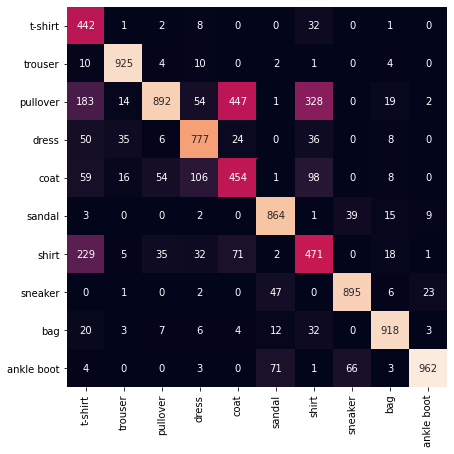

In [5]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(loggers['SVM (linear)'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, yticklabels=classes, square=True)
fig.savefig('img/confusion.pdf')

In [6]:
loggers['SVM (linear)'].recall


array([0.442, 0.925, 0.892, 0.777, 0.454, 0.864, 0.471, 0.895, 0.918,
       0.962])

<AxesSubplot:>

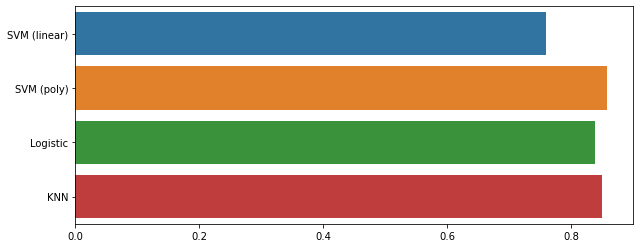

In [7]:
acc = [l.accuracy for l in loggers.values()]
plt.figure(figsize=(10, 4))
sns.barplot(y=list(models.keys()), x=acc)


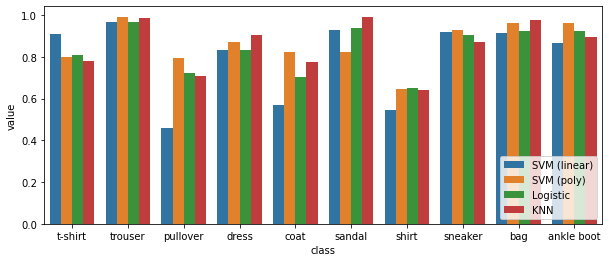

In [8]:
ps = {k: v.precision for k, v in loggers.items()}
ps = {'class': classes, **ps}

df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(10, 4))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right')


In [9]:
X_train, y_train = load_mnist('data/FashionMNIST/raw', kind='train')
X_test, y_test = load_mnist('data/FashionMNIST/raw', kind='t10k')

def show_samples(X, y, num, prediction=None, sort=True, cols=32, width_mul=1):
    if prediction is None:
        height_mul = 1
    else:
        height_mul = 2
        
    if sort: 
        idx = np.argsort(y[:num])
        X = X[idx]
        if prediction is not None:
            prediction = prediction[idx]
    fig, ax = plt.subplots(nrows=num//cols, ncols=cols, figsize=(width_mul*cols, height_mul*num//cols))
    for i in range(num):
        ax[i//cols, i%cols].axis('off')
        ax[i//cols, i%cols].imshow(X[i].reshape((28, 28)), cmap='gray')
        if prediction is not None:
            ax[i//cols, i%cols].set_title(f'{classes[prediction[i]]}/{classes[y[i]]}')


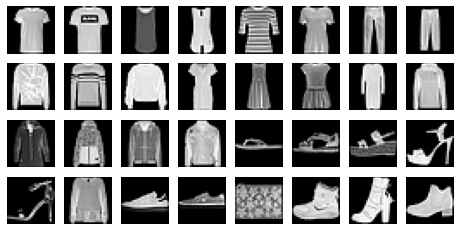

In [10]:
show_samples(X_train, y_train, 32, cols=8)


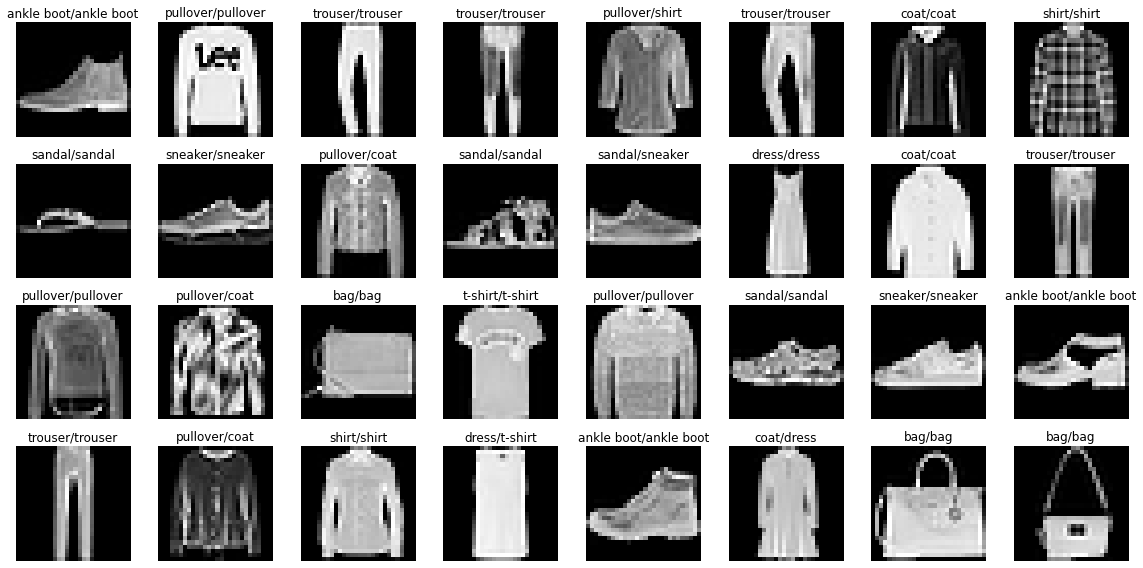

In [11]:
p = models['SVM (linear)'].predict(X_test)

#wrong = y_test != p

X = X_test#[wrong]
p = p#[wrong]
y = y_test#[wrong]

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result.pdf')


In [12]:
models['CNN'].predict(models['CNN'].test_data)


KeyError: 'CNN'